In [432]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
# loading the dataset

data = np.load('/content/drive/MyDrive/Problem Set 3/ps3_genetic_fingerprints.npy')

In [434]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,0.0,0.0,0.0,0.0,3.128559,0.000000,0.0,4.496228,0.0,0.0,0.0,0.0,0.0,0.0,9.329172,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.698161,0.0,0.000000,3.057609,0.0,0.000000,2.293305,0.0,0.000000,0.0,0.000000,4.567901,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.328777,0.0,0.0,0.107813,0.000000,0.000000,0.000000,0.0,0.00000,2.081274,0.0,1.615187,0.0,0.0,0.0,0.0,5.867198,0.0,0.000000,0.000000,0.0,0.0,1.249324,0.0,0.0,0.871549,0.0,2.019311,0.000000,0.0,0.069410,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,5.295702,0.000000,0.0,6.844680,0.0,0.0,0.0,0.0,0.0,0.0,10.515966,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.087367,0.0,2.141028,2.203477,0.0,0.000000,1.218063,0.0,0.000000,0.0,0.000000,3.976528,0.0,...,0.0,0.000000,0.0,0.0,0.0,2.488034,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,2.333436,0.0,1.559518,0.0,0.0,0.0,0.0,4.123314,0.0,0.000000,0.000000,0.0,0.0,2.678591,0.0,0.0,1.287397,0.0,2.145090,0.000000,0.0,1.098942,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,3.765731,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.219667,0.0,0.0,0.304137,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.708340,4.377068,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.780555,11.366491,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.519372,5.475708,1.433572,0.000000,0.0,0.00000,0.432083,0.0,5.019034,0.0,0.0,0.0,0.0,2.855581,0.0,0.000000,1.006585,0.0,0.0,4.748622,0.0,0.0,2.719997,0.0,0.000000,0.000000,0.0,0.302984,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,5.341002,0.000000,0.0,3.872762,0.0,0.0,0.0,0.0,0.0,0.0,9.674842,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,4.501315,0.0,2.352041,3.091592,0.0,0.000000,0.043334,0.0,0.000000,0.0,0.561752,2.180508,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.197128,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,5.511518,0.0,6.227623,0.0,0.0,0.0,0.0,6.943329,0.0,0.000000,0.000000,0.0,0.0,3.586890,0.0,0.0,1.225244,0.0,0.000000,0.000000,0.0,1.880824,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,6.891280,0.000000,0.0,7.363128,0.0,0.0,0.0,0.0,0.0,0.0,10.449700,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,6.456200,0.0,6.175744,1.672773,0.0,0.000000,2.161257,0.0,0.000000,0.0,0.658286,3.846383,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,4.059121,0.0,3.286476,0.0,0.0,0.0,0.0,8.868149,0.0,0.000000,0.000000,0.0,0.0,4.851162,0.0,0.0,0.220030,0.0,0.000000,0.000000,0.0,0.599354,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382930,0.0,0.0,0.0,0.0,0.0,0.0,7.411427,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.274830,4.153697,0.0,0.263334,0.000000,0.0,0.000000,0.0,0.000000,9.430633,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.571939,6.407273,0.000000,0.587893,0.0,0.00000,2.978759,0.0,3.576594,0.0,0.0,0.0,0.0,1.286359,0.0,0.000000,1.996297,0.0,0.0,3.998126,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
16926,0.0,0.0,0.0,0.0,0.000000,2.848180,0.0,2.615071,0.0,0.0,0.0,0.0,0.0,0.0,5.264143,0.0,0.0,0.060962,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.503601,5.577973,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.170801,8.376842,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.807816,4.804813,0.000000,0.000000,0.0,0.00000,5.683881,0.0,4.413293,0.0,0.0,0.0,0.0,3.401217,0.0,0.000000,2.771749,0.0,0.0,5.305144,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0



---
Since there are 512 features, we perform PCA to reduce the dimensionality

---





In [436]:
# finding the number of dimensions required to cover optimal explained variance
# We use Principal Component Analysis to find the most important dimensions

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

explained_variance = np.cumsum(pca.explained_variance_ratio_)


d = np.argmax(explained_variance >= 0.97) + 1

In [437]:
# checking the number of components selected that cover the above variance

d

72

In [438]:
# creating an array of integers from (1,512)

x = np.arange(1, data.shape[1]+1)

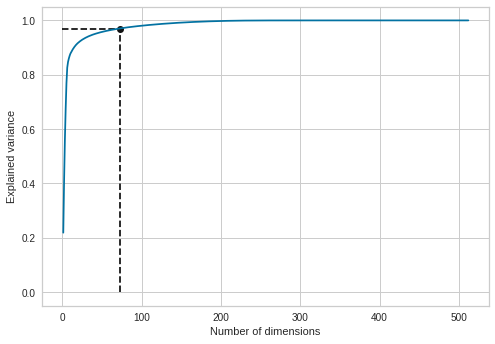

In [439]:
plt.plot(72,0.97, 'ko')
plt.vlines(72,0,0.97, linestyle='dashed')
plt.hlines(0.97,0,72, linestyles='dashed')
plt.grid('true')
plt.xlabel('Number of dimensions')
plt.ylabel('Explained variance')
plt.plot(x, explained_variance)

In [440]:
# transforming the original dataset with 512 dimensions to 54 dimensions that cover 96% of variance in the dataset

pca = PCA(n_components=72)
pca_components = pca.fit_transform(data)

In [441]:
pca_components.shape

(16930, 72)

In [442]:
a = pd.DataFrame(pca_components)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,20.469759,-5.655286,-8.863584,-0.455510,-0.227961,-9.377810,-0.690225,-2.259064,0.466229,-1.961398,1.271440,-1.637787,-1.617257,-4.081765,0.405903,0.824627,0.401089,0.476558,0.942520,0.638497,-1.050299,0.766255,2.612943,1.118502,-1.518077,-0.306713,0.541079,0.710803,-0.784492,1.180829,0.870737,0.558148,0.216586,-0.319184,1.891005,-1.054685,-0.193663,0.383159,-0.308568,-0.551770,2.083442,0.018947,0.726995,-0.875424,-0.406848,1.389587,0.587517,-0.057268,-0.698077,-0.771887,-0.710298,-1.175416,-0.211522,0.464948,1.249722,0.632002,-0.056894,-0.900953,-0.292877,0.163857,0.296293,0.089177,1.129809,0.710871,-0.809861,0.089266,-0.323656,0.310030,0.150868,0.126637,-0.899786,-0.533827
1,32.173447,-5.625537,-12.934125,1.095271,-3.730120,-12.391017,2.549200,3.091561,-0.087214,1.508157,3.022145,-1.943517,3.502272,-2.060146,-2.646777,1.238073,0.947448,-1.799842,-0.333924,-1.104826,-2.046113,0.125512,-0.048999,0.480923,1.891690,-2.775460,-1.764518,0.960227,2.336954,0.079191,-0.418162,1.160964,0.081298,-0.804510,-0.384375,-0.415078,0.184073,-1.114058,-1.355210,0.675487,-0.085094,0.595001,-1.326525,0.932819,-0.294291,1.951867,-1.434673,-0.900306,-0.880999,0.755179,0.159118,0.637867,-0.915841,-1.523225,0.016839,-1.104232,0.573806,0.518988,0.830265,-0.244090,0.214265,1.122784,-0.023802,0.778006,1.491679,-0.357246,-0.496106,0.824044,-0.381539,-0.191935,0.123778,0.673832
2,-4.991086,-16.555044,-2.681181,13.238574,12.018165,11.402614,-1.838534,-1.107474,5.646788,-0.024764,-3.699301,0.640449,3.492723,2.772884,-3.944170,-1.816724,2.547490,-3.836853,-0.518361,-2.511078,2.926204,1.222521,1.546391,1.095769,0.902406,-0.288812,-1.257991,-0.006262,0.669096,1.448968,0.778955,0.987588,-0.183971,-1.237666,3.276482,1.093605,0.094152,2.336711,-0.376136,-2.252420,-1.546023,0.088501,1.314368,-0.124807,-1.430531,0.975214,-0.832456,0.000411,0.098383,-0.280121,0.541717,-0.827731,0.523850,-0.785273,1.456790,-0.116481,-0.523360,1.006959,-0.398692,-1.619718,0.003164,-0.648297,-0.132170,-0.417612,-0.342853,-0.132905,-1.568967,0.506338,-0.180525,-1.902610,0.797689,-0.311499
3,25.993568,-10.613060,-9.136895,-3.750298,3.300403,-9.947263,-0.430974,4.759447,1.048422,-0.407839,5.223706,-1.807133,-2.060266,-0.759131,1.968608,0.322195,2.827858,2.898145,1.954073,-0.519301,0.111630,-2.545579,0.664649,1.802445,-2.996413,-2.384409,-0.116718,-0.394219,0.097316,-0.659143,1.483436,-2.499883,0.186274,1.371650,-0.473434,-0.942883,-1.110558,1.816871,0.040134,1.066700,-0.217376,-1.981810,0.527222,-0.788329,1.451944,-0.368833,-0.969025,1.281729,1.377800,0.851712,-2.165888,-1.565281,-0.363565,-0.341081,-0.748019,-0.341324,0.239816,-0.384262,0.008406,0.163381,2.277903,-0.567291,-0.679657,1.571509,0.514952,-0.497578,-0.248663,0.980614,0.812619,0.075279,1.390140,-1.477983
4,35.301231,-12.995623,-11.019108,-1.153186,-0.914079,-14.857183,1.729320,8.555648,-0.887264,2.483299,4.847696,-1.459529,-0.401837,-1.843557,0.778988,1.959203,1.857553,2.136031,1.172906,-1.189954,2.307490,-1.519487,0.556895,0.834404,-0.243535,-1.654538,-0.029496,1.261474,-0.912980,-2.373660,0.751831,1.380948,0.835177,0.430333,-2.378876,0.608902,-1.052420,2.745739,1.801549,-0.809753,-1.014432,0.658677,-0.179398,-2.275377,3.298849,1.563028,-0.752063,0.128885,1.943999,0.762640,0.438147,-1.083991,-0.090209,-0.883903,-0.372885,0.079187,-0.032426,0.015579,0.766910,1.219849,-0.963604,-0.741459,1.331972,0.620505,0.260597,-2.028099,-0.126619,0.182429,1.120423,-0.524131,0.751710,0.977164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,-3.157721,-10.338863,-8.795933,8.147721,14.698485,9



---
Estimating the optimal number of clusters using Inertia and Silhouette Score

---





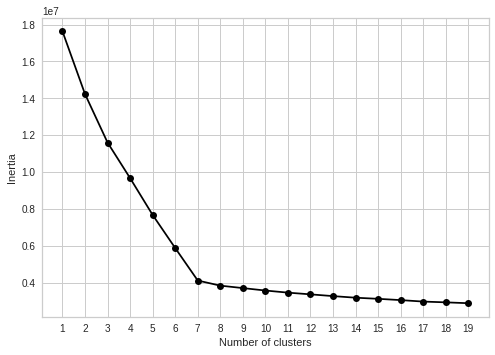

In [443]:
# calculating inertia to find the optimal number of clusters

from sklearn.cluster import KMeans
ks = range(1, 20)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=77)
    model.fit(pca_components)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid('true')
plt.show()

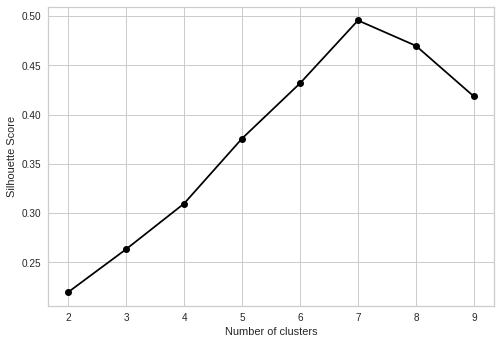

In [444]:
# calculating Silhouette Score to check and validate if the number of clusters is optimal

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = range(2, 10)
ss = []
for k in ks:
    model = KMeans(n_clusters=k , random_state=77)
    l = model.fit_predict(pca_components)
    ss.append(silhouette_score(pca_components, l))
    
plt.plot(ks, ss, '-o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.grid('true')
plt.show()



---
Trying different initialization methods on the KMeans model to check which one performs best.

Here we try kmeans++ and random initializations

---





In [445]:
# comparing models based on different initialization methods

from sklearn.cluster import KMeans

# k-means++ initializer
print("kmeans++ Initializer")

kpp_inertia=[]
for i in range(5,11):
  kmeans = KMeans(n_clusters= i, init="k-means++", random_state=77)
 
  #predict the labels of clusters.
  label = kmeans.fit_predict(pca_components)
  kpp_inertia.append(kmeans.inertia_)
  print(f'Number of clusters: {i}, Inertia = {kmeans.inertia_}')


# Random initializer
print("\nRandom Initializer")

random_inertia = []
for i in range(5,11):
  kmeans = KMeans(n_clusters= i, init="random", random_state=77)
 
  #predict the labels of clusters.
  label = kmeans.fit_predict(pca_components)
  random_inertia.append(kmeans.inertia_)
  print(f'Number of clusters: {i}, Inertia = {kmeans.inertia_}')

kmeans++ Initializer
Number of clusters: 5, Inertia = 7666682.544247245
Number of clusters: 6, Inertia = 5872689.495404093
Number of clusters: 7, Inertia = 4109909.5831985655
Number of clusters: 8, Inertia = 3832657.4306503013
Number of clusters: 9, Inertia = 3700067.27565384
Number of clusters: 10, Inertia = 3567858.8808647436

Random Initializer
Number of clusters: 5, Inertia = 7753962.537415983
Number of clusters: 6, Inertia = 5872688.997511867
Number of clusters: 7, Inertia = 4109909.5831985655
Number of clusters: 8, Inertia = 3832656.0386688192
Number of clusters: 9, Inertia = 3694691.2607147214
Number of clusters: 10, Inertia = 3573718.417705936


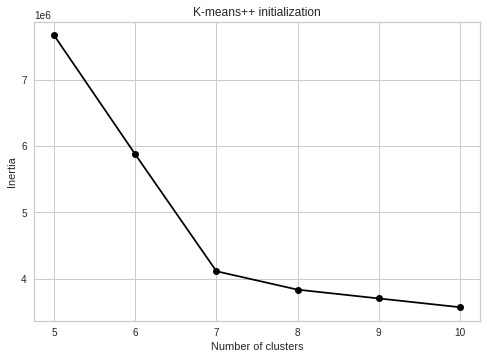

In [446]:
# plotting results for inertia using kmeans++ initialization

ks = range(5,11)
plt.plot(ks, kpp_inertia, '-o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("K-means++ initialization")
plt.xticks(ks)
plt.grid('true')
plt.show()

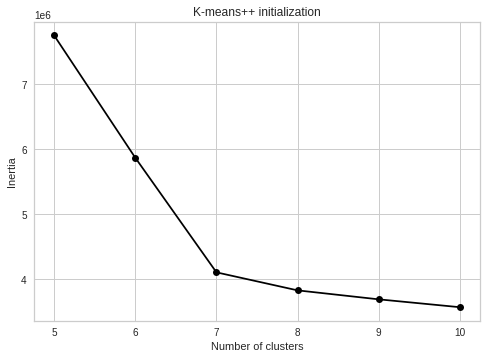

In [447]:
# plotting results for inertia using kmeans++ initialization

ks = range(5,11)
plt.plot(ks, random_inertia, '-o', color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("K-means++ initialization")
plt.xticks(ks)
plt.grid('true')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2035557
For n_clusters = 3 The average silhouette_score is : 0.26316828
For n_clusters = 4 The average silhouette_score is : 0.3199273
For n_clusters = 5 The average silhouette_score is : 0.3757865
For n_clusters = 6 The average silhouette_score is : 0.4317088
For n_clusters = 7 The average silhouette_score is : 0.49559024
For n_clusters = 8 The average silhouette_score is : 0.46978286
For n_clusters = 9 The average silhouette_score is : 0.41832477


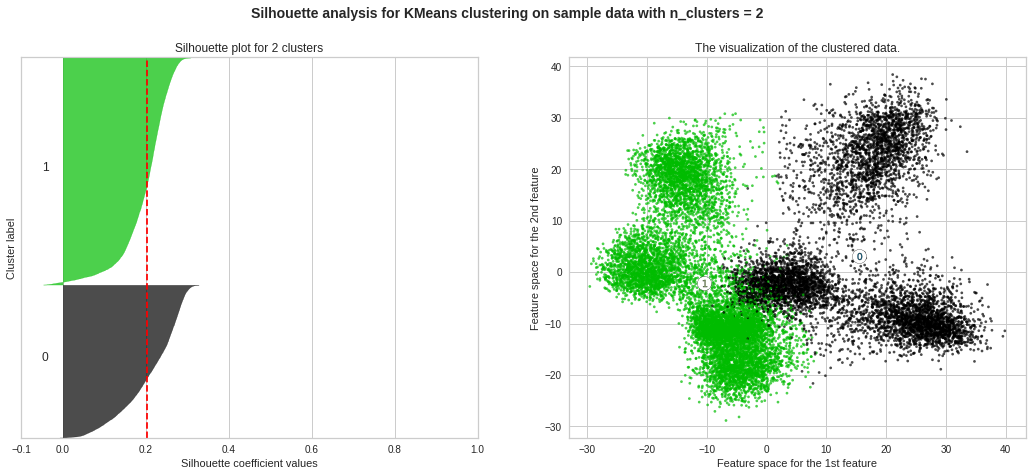

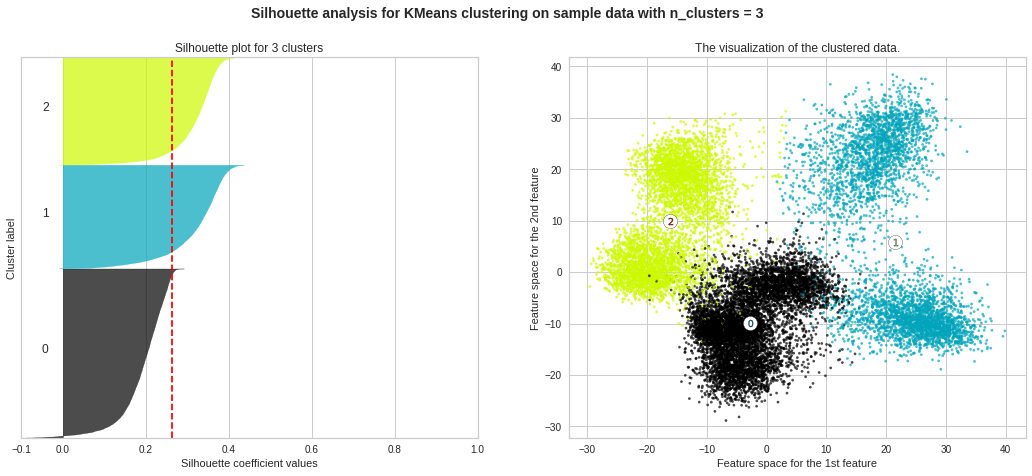

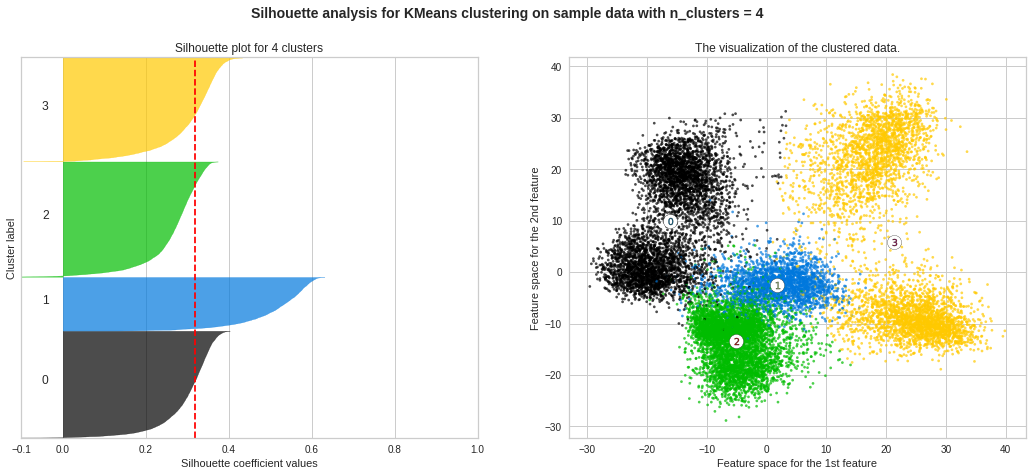

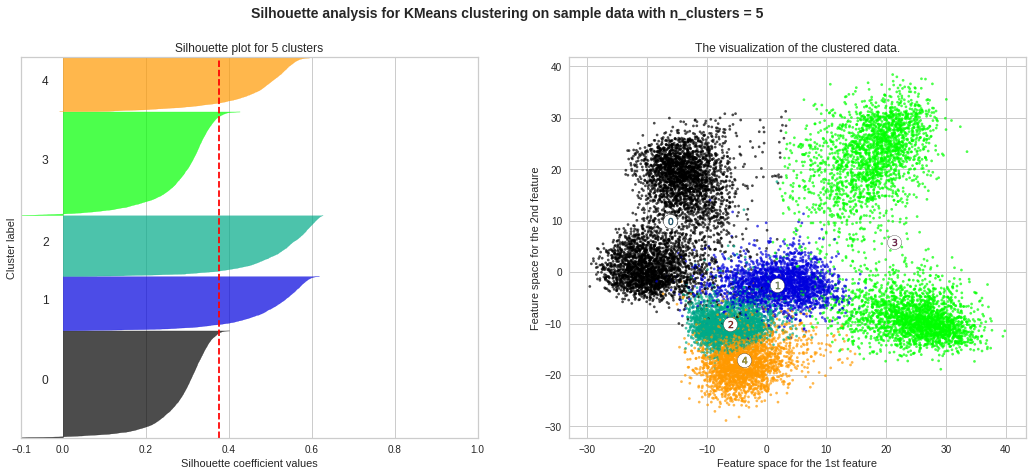

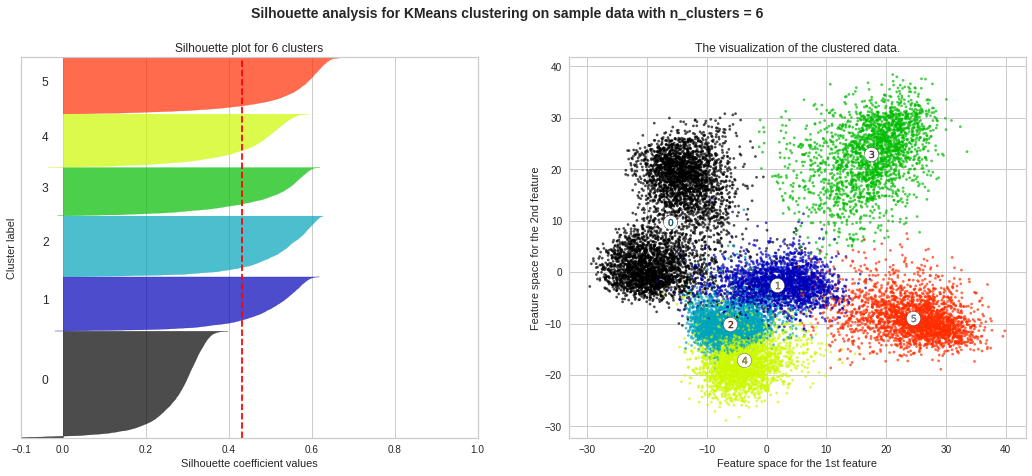

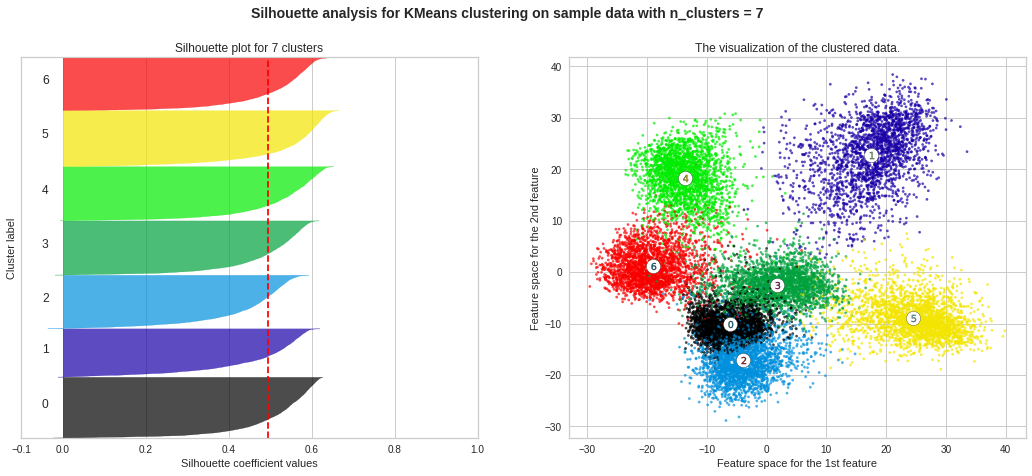

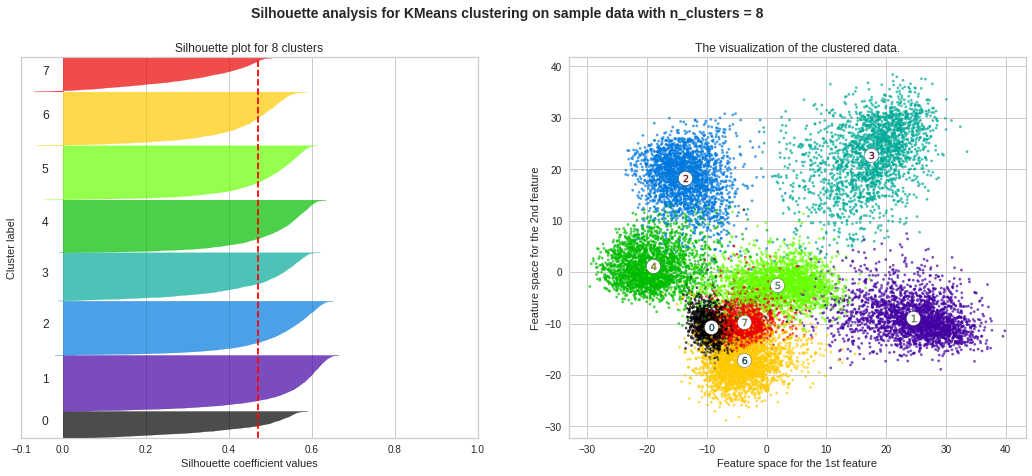

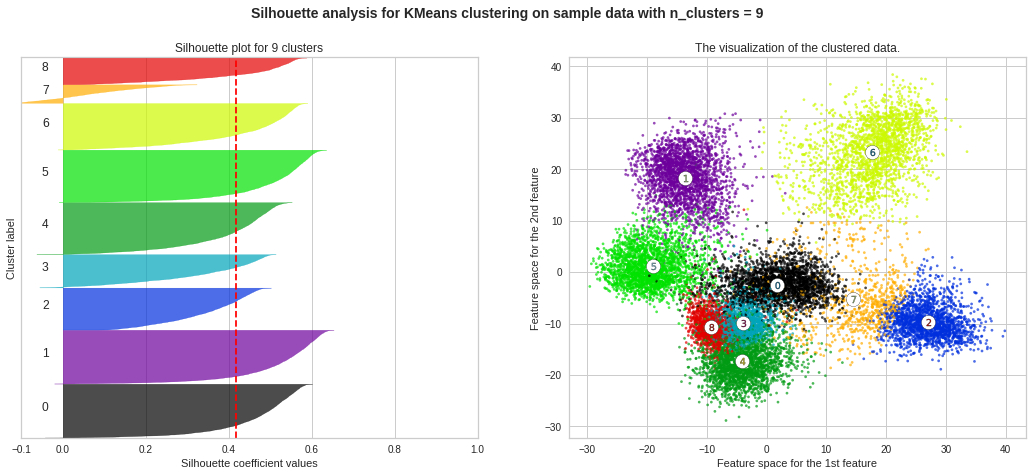

In [448]:
# plotting silhouette diagram for various clusters
# reffered from https://scikit-learn.org/stable/modules/clustering.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X= pca_components

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
  
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # set random_state for constant results over multiple runs
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)


    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"Silhouette plot for {n_clusters} clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [449]:
a = pd.DataFrame(pca_components)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,20.469759,-5.655286,-8.863584,-0.455510,-0.227961,-9.377810,-0.690225,-2.259064,0.466229,-1.961398,1.271440,-1.637787,-1.617257,-4.081765,0.405903,0.824627,0.401089,0.476558,0.942520,0.638497,-1.050299,0.766255,2.612943,1.118502,-1.518077,-0.306713,0.541079,0.710803,-0.784492,1.180829,0.870737,0.558148,0.216586,-0.319184,1.891005,-1.054685,-0.193663,0.383159,-0.308568,-0.551770,2.083442,0.018947,0.726995,-0.875424,-0.406848,1.389587,0.587517,-0.057268,-0.698077,-0.771887,-0.710298,-1.175416,-0.211522,0.464948,1.249722,0.632002,-0.056894,-0.900953,-0.292877,0.163857,0.296293,0.089177,1.129809,0.710871,-0.809861,0.089266,-0.323656,0.310030,0.150868,0.126637,-0.899786,-0.533827
1,32.173447,-5.625537,-12.934125,1.095271,-3.730120,-12.391017,2.549200,3.091561,-0.087214,1.508157,3.022145,-1.943517,3.502272,-2.060146,-2.646777,1.238073,0.947448,-1.799842,-0.333924,-1.104826,-2.046113,0.125512,-0.048999,0.480923,1.891690,-2.775460,-1.764518,0.960227,2.336954,0.079191,-0.418162,1.160964,0.081298,-0.804510,-0.384375,-0.415078,0.184073,-1.114058,-1.355210,0.675487,-0.085094,0.595001,-1.326525,0.932819,-0.294291,1.951867,-1.434673,-0.900306,-0.880999,0.755179,0.159118,0.637867,-0.915841,-1.523225,0.016839,-1.104232,0.573806,0.518988,0.830265,-0.244090,0.214265,1.122784,-0.023802,0.778006,1.491679,-0.357246,-0.496106,0.824044,-0.381539,-0.191935,0.123778,0.673832
2,-4.991086,-16.555044,-2.681181,13.238574,12.018165,11.402614,-1.838534,-1.107474,5.646788,-0.024764,-3.699301,0.640449,3.492723,2.772884,-3.944170,-1.816724,2.547490,-3.836853,-0.518361,-2.511078,2.926204,1.222521,1.546391,1.095769,0.902406,-0.288812,-1.257991,-0.006262,0.669096,1.448968,0.778955,0.987588,-0.183971,-1.237666,3.276482,1.093605,0.094152,2.336711,-0.376136,-2.252420,-1.546023,0.088501,1.314368,-0.124807,-1.430531,0.975214,-0.832456,0.000411,0.098383,-0.280121,0.541717,-0.827731,0.523850,-0.785273,1.456790,-0.116481,-0.523360,1.006959,-0.398692,-1.619718,0.003164,-0.648297,-0.132170,-0.417612,-0.342853,-0.132905,-1.568967,0.506338,-0.180525,-1.902610,0.797689,-0.311499
3,25.993568,-10.613060,-9.136895,-3.750298,3.300403,-9.947263,-0.430974,4.759447,1.048422,-0.407839,5.223706,-1.807133,-2.060266,-0.759131,1.968608,0.322195,2.827858,2.898145,1.954073,-0.519301,0.111630,-2.545579,0.664649,1.802445,-2.996413,-2.384409,-0.116718,-0.394219,0.097316,-0.659143,1.483436,-2.499883,0.186274,1.371650,-0.473434,-0.942883,-1.110558,1.816871,0.040134,1.066700,-0.217376,-1.981810,0.527222,-0.788329,1.451944,-0.368833,-0.969025,1.281729,1.377800,0.851712,-2.165888,-1.565281,-0.363565,-0.341081,-0.748019,-0.341324,0.239816,-0.384262,0.008406,0.163381,2.277903,-0.567291,-0.679657,1.571509,0.514952,-0.497578,-0.248663,0.980614,0.812619,0.075279,1.390140,-1.477983
4,35.301231,-12.995623,-11.019108,-1.153186,-0.914079,-14.857183,1.729320,8.555648,-0.887264,2.483299,4.847696,-1.459529,-0.401837,-1.843557,0.778988,1.959203,1.857553,2.136031,1.172906,-1.189954,2.307490,-1.519487,0.556895,0.834404,-0.243535,-1.654538,-0.029496,1.261474,-0.912980,-2.373660,0.751831,1.380948,0.835177,0.430333,-2.378876,0.608902,-1.052420,2.745739,1.801549,-0.809753,-1.014432,0.658677,-0.179398,-2.275377,3.298849,1.563028,-0.752063,0.128885,1.943999,0.762640,0.438147,-1.083991,-0.090209,-0.883903,-0.372885,0.079187,-0.032426,0.015579,0.766910,1.219849,-0.963604,-0.741459,1.331972,0.620505,0.260597,-2.028099,-0.126619,0.182429,1.120423,-0.524131,0.751710,0.977164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16925,-3.157721,-10.338863,-8.795933,8.147721,14.698485,9



---
Plotting the final clusters

---





No handles with labels found to put in legend.


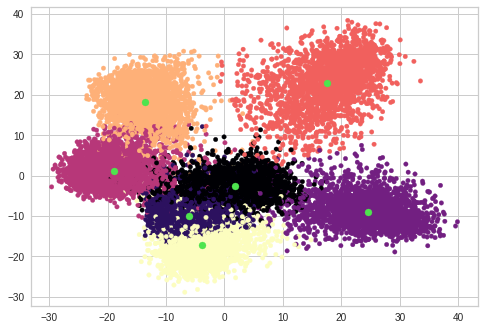

In [450]:
# plotting the final 7 clusters and their centroids

import matplotlib.cm

kmeans = KMeans(n_clusters= 7, random_state=77)
labels = kmeans.fit_predict(pca_components)
distinct_labels = np.unique(labels)
centroids = kmeans.cluster_centers_
plt.scatter(pca_components[:, 0] , pca_components[:,1], c=kmeans.labels_, cmap='magma',s=20)
plt.scatter(centroids[:,0],centroids[:,1], color='#4ee44e')

plt.legend()
plt.show()

In [451]:
# loading patient z data

patientz = np.load('/content/drive/MyDrive/Problem Set 3/ps3_patient_zet.npy')
patients=patientz.reshape(1,-1)
patients.shape

(1, 512)

In [452]:
# performing similar transformations on patient z data

patients_tra=pca.transform(patients)
patients_tra.shape

(1, 72)

No handles with labels found to put in legend.


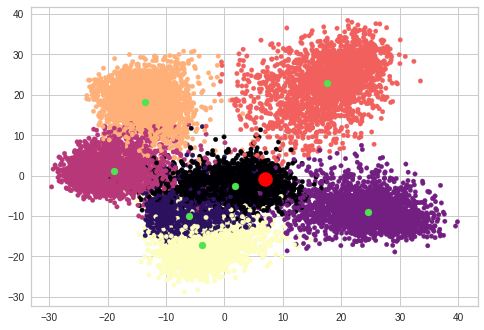

In [453]:
# plotting the final 7 clusters and their centroids
# plotting patient z and identifying its cluster

import matplotlib.cm

kmeans = KMeans(n_clusters= 7, random_state=77)
labels = kmeans.fit_predict(pca_components)
distinct_labels = np.unique(labels)
centroids = kmeans.cluster_centers_
plt.scatter(pca_components[:, 0] , pca_components[:,1], c=kmeans.labels_, cmap='magma',s=20)
plt.scatter(centroids[:,0],centroids[:,1], color='#4ee44e')
plt.scatter(patients_tra[:,0], patients_tra[:,1], color='red',s=200)
plt.legend()
plt.show()

In [454]:
# fitting model and predicting label/cluster for patient z

f_model=KMeans(n_clusters=7, random_state=77)
f_model.fit(pca_components)
z =f_model.predict(patients_tra)
z.shape

(1,)

In [455]:
# label of cluster to which patient z belongs to
print(z)

[0]


In [456]:
# display labels assigned to instances based on cluster

pred=f_model.predict(pca_components)
pred

array([2, 2, 6, ..., 0, 3, 3], dtype=int32)

In [457]:
df=pd.DataFrame(pred,columns=['Predicted'])
df

,Predicted
0,2
1,2
2,6
3,2
4,2
...,...
16925,6
16926,6
16927,0
16928,3


In [458]:
# converting all labels to 1 if they belong to the same cluster as patient Z

df['Predicted']=df['Predicted'].apply(lambda x: 1 if x==0 else 0)

In [459]:
df

,Predicted
0,0
1,0
2,0
3,0
4,0
...,...
16925,0
16926,0
16927,1
16928,0


In [465]:
#calculating number of individuals that belong to the same cluster as patient Z

df['Predicted'].value_counts()

0    14508
1     2422
Name: Predicted, dtype: int64

In [460]:
df.reset_index(inplace=True)
df=df.rename(columns={'index':'Id'})
df

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
16925,16925,0
16926,16926,0
16927,16927,1
16928,16928,0


In [461]:
df.to_csv('/content/drive/MyDrive/Problem Set 3/submission.csv',index=False)